# Predicting S&P 500 Price Movement 

### Based on major global stock market indices using Neural Network

### Description
- Finance industry has numerous information and its complexity is suitable for using neural network. 
- Instead of predicting a stock price, we are going to predict return’s direction, positive or negative. It will be treated as two classes. 

### Dataset
- 6 major stock market indices from different time zone
![](../img/Picture1.png)

- US S&P500
- Austrialia S&P ASX300
- Japan Nikkei 225
- Hongkong HangSeng 
- Frankfurt DAX
- London FTSE 100

### Motives
If financial market is perfect, all relevant information should be available to everyone immediately and price of any product or service should reflect it immediately. In other words, price is the product of all relevant information.
In reality, there are a number of limitations that prevent the market to be perfect. However, due to advanced technology and relatively low cost of transactions, stock market resembles the ideal perfect market. 
Each major stock market indices should reflect all relevant information available. Can we use stock market indices to predict another stock market index? 

### Limitations
Given such a high degree globalization in business, country specific biases of stock market indices should be neutralized in a way. 
Stock market price fluctuate continuously during the market is open. I will focus on closing price of each indices. 
Predicting specific absolute number of price would be very challenging. But predicting positive or negative movement would be simpler. 

### Data Collection
Source : finance.yahoo.com

Duration : 2014/3/26 - 2019/3/26

- S&P500  : https://finance.yahoo.com/quote/%5EGSPC/history/
- S&P AXS300 : https://au.finance.yahoo.com/quote/%5EAXJO/history?period1=1336190400&period2=1493956800&interval=1d&filter=history&frequency=1d
- HangSeng Index : https://finance.yahoo.com/quote/%5EHSI/history?period1=1336190400&period2=1493956800&interval=1d&filter=history&frequency=1d
- Nikkei 225 : https://finance.yahoo.com/quote/%5EN225/history?period1=1462482232&period2=1494018232&interval=1d&filter=history&frequency=1d
- DAX : https://finance.yahoo.com/quote/%5EGDAXI/history?period1=1336190400&period2=1493956800&interval=1d&filter=history&frequency=1d
- FTSE 100 : https://www.investing.com/indices/uk-100-historical-data


## Importing Packages

In [91]:
import pandas as pd
import os
import datetime
from datetime import date, datetime, timedelta, time
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import tensorflow as tf

## Wragling Data

In [92]:
SNPraw=pd.read_csv("../data/S&P500.csv")
ASXraw=pd.read_csv("../data/ASX200.csv")
NIKraw=pd.read_csv("../data/Nikkei225.csv")
HSraw = pd.read_csv("../data/HangSeng.csv")
DAXraw = pd.read_csv("../data/DAX.csv")
FTSEraw=pd.read_csv("../data/FTSE100.csv")


Let's have a quick look at the data.

In [93]:
SNPraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-26,1867.089966,1875.920044,1852.560059,1852.560059,1852.560059,3480850000
1,2014-03-27,1852.109985,1855.550049,1842.109985,1849.040039,1849.040039,3733430000
2,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000
3,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000
4,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000


In [94]:
ASXraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-24,5346.899902,5346.899902,5310.700195,5336.600098,5336.600098,667344800.0
1,2014-03-25,5336.600098,5394.200195,5336.600098,5376.799805,5376.799805,701665500.0
2,2014-03-26,5376.799805,5376.799805,5322.200195,5350.100098,5350.100098,638887700.0
3,2014-03-27,5350.100098,5372.500000,5342.700195,5366.899902,5366.899902,709931000.0
4,2014-03-30,5366.899902,5416.000000,5366.899902,5394.799805,5394.799805,611515200.0


In [95]:
NIKraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-26,14521.000000,14569.900391,14401.419922,14477.160156,14477.160156,166600.0
1,2014-03-27,14305.669922,14659.849609,14227.809570,14622.889648,14622.889648,179000.0
2,2014-03-28,14576.250000,14713.450195,14520.570313,14696.030273,14696.030273,149300.0
3,2014-03-31,14839.540039,14843.669922,14718.009766,14827.830078,14827.830078,141600.0
4,2014-04-01,14870.509766,14870.509766,14751.290039,14791.990234,14791.990234,139200.0


In [96]:
HSraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-26,21889.759766,22006.640625,21865.330078,21887.750000,21887.750000,1.917734e+09
1,2014-03-27,21897.070313,21926.830078,21715.630859,21834.449219,21834.449219,2.222326e+09
2,2014-03-28,21930.400391,22143.240234,21930.400391,22065.529297,22065.529297,2.147316e+09
3,2014-03-31,22244.160156,22244.160156,22043.509766,22151.060547,22151.060547,1.919012e+09
4,2014-04-01,22292.320313,22458.939453,22250.660156,22448.539063,22448.539063,1.598523e+09


In [97]:
DAXraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-26,9367.530273,9488.740234,9360.299805,9448.580078,9448.580078,75841600.0
1,2014-03-27,9428.910156,9469.389648,9397.980469,9451.209961,9451.209961,66826100.0
2,2014-03-28,9487.120117,9587.190430,9484.900391,9587.190430,9587.190430,70498400.0
3,2014-03-31,9621.919922,9634.820313,9543.089844,9555.910156,9555.910156,68772900.0
4,2014-04-01,9601.959961,9631.059570,9574.629883,9603.709961,9603.709961,72835100.0


In [98]:
FTSEraw.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 26, 2019","7,196.29","7,177.58","7,221.02","7,169.37",-,0.26%
1,"Mar 25, 2019","7,177.58","7,207.59","7,208.09","7,146.83",604.28M,-0.42%
2,"Mar 22, 2019","7,207.59","7,355.31","7,356.37","7,192.76",716.21M,-2.01%
3,"Mar 21, 2019","7,355.31","7,291.01","7,370.61","7,290.62",731.35M,0.88%
4,"Mar 20, 2019","7,291.01","7,324.00","7,341.57","7,291.01",771.73M,-0.45%


Quick glance at the data already suggest a couple of data cleaning challenges

## 1. Data type of Date
### -string to datetime

In [99]:
Allraw=[SNPraw,ASXraw,NIKraw,HSraw,DAXraw,FTSEraw]

In [100]:
for i in Allraw:
    print(type(i.iloc[0,0]),'\n')

<class 'str'> 

<class 'str'> 

<class 'str'> 

<class 'str'> 

<class 'str'> 

<class 'str'> 



All data under Date is not a true datetime type but simple strings. If I leave it as they are, it is impossible to merge each dataframe based on dates. Using datetime.strptime I will convert the Date data.

In [101]:
SNPraw.iloc[:,0]=[datetime.strptime(i,'%Y-%m-%d').date() for i in SNPraw.iloc[:,0]]
ASXraw.iloc[:,0]=[datetime.strptime(i,'%Y-%m-%d').date() for i in ASXraw.iloc[:,0]]
NIKraw.iloc[:,0]=[datetime.strptime(i,'%Y-%m-%d').date() for i in NIKraw.iloc[:,0]]
HSraw.iloc[:,0]=[datetime.strptime(i,'%Y-%m-%d').date() for i in HSraw.iloc[:,0]]
DAXraw.iloc[:,0]=[datetime.strptime(i,'%Y-%m-%d').date() for i in DAXraw.iloc[:,0]]
FTSEraw.iloc[:,0] = [datetime.strptime(i,'%b %d, %Y').date() for i in FTSEraw.iloc[:,0]]

Let's look at the data again.

In [102]:
for i in Allraw:
    print(type(i.iloc[0,0]),'\n')

<class 'datetime.date'> 

<class 'datetime.date'> 

<class 'datetime.date'> 

<class 'datetime.date'> 

<class 'datetime.date'> 

<class 'datetime.date'> 



## 2. Price data type
### - string to float

The price data is not exactly integer or float that can be used. I will convert them from string to float.

Before diving into 6 different dataframes, I want to focus on the FTSEraw dataframe.

In [103]:
FTSEraw.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-26,"7,196.29","7,177.58","7,221.02","7,169.37",-,0.26%
1,2019-03-25,"7,177.58","7,207.59","7,208.09","7,146.83",604.28M,-0.42%
2,2019-03-22,"7,207.59","7,355.31","7,356.37","7,192.76",716.21M,-2.01%
3,2019-03-21,"7,355.31","7,291.01","7,370.61","7,290.62",731.35M,0.88%
4,2019-03-20,"7,291.01","7,324.00","7,341.57","7,291.01",771.73M,-0.45%


The Volume column data is string and contains M or B. I need to convert it to actual numberic value.

In [104]:
#A custom function that changes string with M or B to decimal digits

from decimal import Decimal
d = {
        'M': 6,
        'B': 9
}
def text_to_num(text):
        if text[-1] in d:
            num, magnitude = text[:-1], text[-1]
            return Decimal(num) * 10 ** d[magnitude]
        else:
            return text

*https://stackoverflow.com/questions/11896560/how-can-i-consistently-convert-strings-like-3-71b-and-4m-to-numbers-in-pytho/11896814*

In [105]:
for i in range(0,FTSEraw.shape[0]):
    if FTSEraw.iloc[i,5] !='-':
        FTSEraw.iloc[i,5] = float(text_to_num(FTSEraw.iloc[i,5]))

In [106]:
FTSEraw.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-26,"7,196.29","7,177.58","7,221.02","7,169.37",-,0.26%
1,2019-03-25,"7,177.58","7,207.59","7,208.09","7,146.83",6.0428e+08,-0.42%
2,2019-03-22,"7,207.59","7,355.31","7,356.37","7,192.76",7.1621e+08,-2.01%
3,2019-03-21,"7,355.31","7,291.01","7,370.61","7,290.62",7.3135e+08,0.88%
4,2019-03-20,"7,291.01","7,324.00","7,341.57","7,291.01",7.7173e+08,-0.45%


For other price information, we see thousands seperator. Would it matter if we want to convert it to numeric data?

In [107]:
#pd.to_numeric(FTSEraw.Price)

Initially I replaced ',' to '' to enable to_numeric. 

In [108]:
FTSEraw.iloc[:,1].str.replace(',','').head()

0    7196.29
1    7177.58
2    7207.59
3    7355.31
4    7291.01
Name: Price, dtype: object

However there is a smater way to do the same. 

*https://stackoverflow.com/questions/1779288/how-to-convert-a-string-to-a-number-if-it-has-commas-in-it-as-thousands-separato*

In [109]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
type(locale.atof("7,297.43"))

float

So let's convert all data to float.

In [110]:
FTSEraw.iloc[:,1:5] = FTSEraw.iloc[:,1:5].applymap(locale.atof)
FTSEraw.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-26,7196.29,7177.58,7221.02,7169.37,-,0.26%
1,2019-03-25,7177.58,7207.59,7208.09,7146.83,6.0428e+08,-0.42%
2,2019-03-22,7207.59,7355.31,7356.37,7192.76,7.1621e+08,-2.01%
3,2019-03-21,7355.31,7291.01,7370.61,7290.62,7.3135e+08,0.88%
4,2019-03-20,7291.01,7324,7341.57,7291.01,7.7173e+08,-0.45%


In [111]:
FTSEraw.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1265,1265.00,1265.00,1265.00,1265.00,1.265000e+03,1265
unique,1265,1258.00,1258.00,1261.00,1252.00,1.156000e+03,355
top,2014-10-14,6753.75,7281.57,6314.57,7099.15,1.060000e+09,-0.01%
freq,1,2.00,2.00,2.00,2.00,1.100000e+01,14


Other dataframes should be converted to data type that can be investigated.

In [112]:
for i in Allraw[:-1]:
    i.iloc[:,1:]=i.iloc[:,1:].applymap(pd.to_numeric)
    print(i.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean   2295.599936  2305.631360  2284.542393  2295.848903  2295.848903   
std     313.091310   313.913100   312.210738   312.866020   312.866020   
min    1818.180054  1834.189941  1810.099976  1815.689941  1815.689941   
25%    2047.892517  2060.602600  2040.632446  2048.934998  2048.934998   
50%    2166.075074  2172.534912  2158.444946  2164.929931  2164.929931   
75%    2590.354981  2601.174926  2579.980042  2595.789978  2595.789978   
max    2936.760010  2940.909912  2927.110107  2930.750000  2930.750000   

             Volume  
count  1.258000e+03  
mean   3.597409e+09  
std    6.940283e+08  
min    1.349780e+09  
25%    3.190855e+09  
50%    3.506820e+09  
75%    3.893518e+09  
max    7.609010e+09  
              Open         High          Low        Close    Adj Close  \
count  1265.000000  1265.000000  1265.000000  1265.000000  12

## 3. Merging dataframes into one

In [113]:
for i in Allraw:
    print(i.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


The last dataframe, FTSEraw has different column names than others. I will change it to match others.

In [114]:
FTSEraw.rename(columns={'Price':'Close','Vol.':'Volume'}, inplace=True)


In [115]:
for i in Allraw:
    print(i.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')


In [116]:
for i in Allraw:
    print(i.Volume.head())

0    3480850000
1    3733430000
2    2955520000
3    3274300000
4    3336190000
Name: Volume, dtype: int64
0    667344800.0
1    701665500.0
2    638887700.0
3    709931000.0
4    611515200.0
Name: Volume, dtype: float64
0    166600.0
1    179000.0
2    149300.0
3    141600.0
4    139200.0
Name: Volume, dtype: float64
0    1.917734e+09
1    2.222326e+09
2    2.147316e+09
3    1.919012e+09
4    1.598523e+09
Name: Volume, dtype: float64
0    75841600.0
1    66826100.0
2    70498400.0
3    68772900.0
4    72835100.0
Name: Volume, dtype: float64
0             -
1    6.0428e+08
2    7.1621e+08
3    7.3135e+08
4    7.7173e+08
Name: Volume, dtype: object


Volume of daily transactions for specific indices might have highly relevant information. However ASX is missing the information entirely. So I will not incorporate Volume data.
But Volatility may be helpful. It will be calcualted as below

![](../img/Volatility.png)

In [117]:
#Creating a range of dates from 2012-05-05 to 2017-05-05
def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta
datelist=[]
for result in perdelta(date(2014,3,26), date(2019,3,27), timedelta(days=1)):
    datelist.append(result)

datelistdf=pd.DataFrame({"Date":datelist})

We need to handle the missing data. I will use forward filling to deal with them. If data for March 3rd is missing, March 2nd data will be copied over. If March 2nd data is also blank, March 1st data will be copied to March 2nd and March 3rd row.

In [133]:
def fulldates(df):
    return(pd.merge(datelistdf, df, how='left', on='Date'))

SNP, ASX, NIK, HS, DAX, FTSE = [fulldates(i).fillna(method='ffill') for i in Allraw]

As we can see from the graph below, ranges for each indices vary greatly. It is due to their different currency denominations and it doesn't mean anything significant. Thus using the closing prices as they are would be misleading. As we are trying to look at the influence of each indices' price on S&P500 movement, it would be more beneficial to convert absolute daily price to daily return. stock index at 1,000 doesn't mean anything unless it is presented in relation to other price points in the past. 

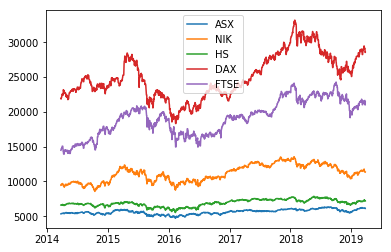

In [136]:
##using matplotlib
plt.plot(SNP.iloc[:,0],pd.DataFrame({"ASX":ASX['Close'],
                                     "NIK":NIK['Close'],
                                     "HS":HS['Close'],
                                    "DAX":DAX['Close'],
                                    "FTSE":FTSE['Close'],}))
plt.legend(["ASX",'NIK','HS','DAX','FTSE'])

In [137]:
#Using Plotly. I prefer this plot since you can check specific data info with the iteractive graphs.
trace0 = go.Scatter(
    x = datelist,
    y = ASX['Close'],
    mode = 'lines',
    name = 'ASX'
)
trace1 = go.Scatter(
    x = datelist,
    y = NIK['Close'],
    mode = 'lines',
    name = 'NIK'
)
trace2 = go.Scatter(
    x = datelist,
    y = HS['Close'],
    mode = 'lines',
    name = 'HS'
)
trace3 = go.Scatter(
    x = datelist,
    y = DAX['Close'],
    mode = 'lines',
    name = 'DAX'
)
trace4 = go.Scatter(
    x = datelist,
    y = FTSE['Close'],
    mode = 'lines',
    name = 'FTSE'
)

data = [trace0, trace1, trace2, trace3, trace4]

py.iplot(data)

## 4. Data Conversion

Final dataframe will include each indices' daily return rate and volatility calculated as mentioned before.

In [138]:
SNP.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-26,1867.089966,1875.920044,1852.560059,1852.560059,1852.560059,3.480850e+09
1,2014-03-27,1852.109985,1855.550049,1842.109985,1849.040039,1849.040039,3.733430e+09
2,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
3,2014-03-29,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
4,2014-03-30,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
5,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3.274300e+09
6,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3.336190e+09
7,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3.131660e+09
8,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3.055600e+09
9,2014-04-04,1890.250000,1897.280029,1863.260010,1865.089966,1865.089966,3.583750e+09


In [139]:
SNP.shift(periods=1,axis=0).head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-26,1867.089966,1875.920044,1852.560059,1852.560059,1852.560059,3.480850e+09
2,2014-03-27,1852.109985,1855.550049,1842.109985,1849.040039,1849.040039,3.733430e+09
3,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
4,2014-03-29,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
5,2014-03-30,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2.955520e+09
6,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3.274300e+09
7,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3.336190e+09
8,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3.131660e+09
9,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3.055600e+09


In [140]:
def returncal(df,columnname):
    todayprice=df[columnname]
    yesterdayprice=df.shift(periods=1,axis=0)[columnname]
    return((todayprice-yesterdayprice)/yesterdayprice*100)

In [141]:
def volatilitycal(df,highcolumn,lowcolumn):
    highprice=df[highcolumn]
    lowprice = df[lowcolumn]
    midprice = (highprice+lowprice)/2
    return((highprice-midprice)/midprice*100)

In [166]:
finaldata = pd.DataFrame({'Date':datelist,
                         'SNPreturn':returncal(SNP,'Close'),
                         'ASXreturn':returncal(ASX,'Close'),
                         'NIKreturn':returncal(NIK,'Close'),
                         'HSreturn':returncal(HS,'Close'),
                         'DAXreturn':returncal(DAX,'Close'),
                         'FTSEreturn':returncal(FTSE,'Close'),
                         'ASXvolatility':volatilitycal(ASX,'High','Low'),
                         'NIKvolatility':volatilitycal(NIK,'High','Low'),
                         'HSvolatility':volatilitycal(HS,'High','Low'),
                         'DAXvolatility':volatilitycal(DAX,'High','Low'),
                         'FTSEvolatility':volatilitycal(FTSE,'High','Low')})

In [167]:
finaldata=finaldata[['Date','SNPreturn',
                         'ASXreturn',
                         'NIKreturn',
                         'HSreturn',
                         'DAXreturn',
                         'FTSEreturn',
                         'ASXvolatility',
                         'NIKvolatility',
                         'HSvolatility',
                         'DAXvolatility',
                         'FTSEvolatility']]

In [168]:
finaldata=finaldata.fillna(method='bfill')

In [169]:
finaldata.head()

,Date,SNPreturn,ASXreturn,NIKreturn,HSreturn,DAXreturn,FTSEreturn,ASXvolatility,NIKvolatility,HSvolatility,DAXvolatility,FTSEvolatility
0,2014-03-26,-0.190008,0.314009,1.006617,-0.243519,0.027834,-0.257066,0.510324,0.581542,0.322098,0.681416,0.315582
1,2014-03-27,-0.190008,0.314009,1.006617,-0.243519,0.027834,-0.257066,0.278108,1.495587,0.483931,0.378480,0.333493
2,2014-03-28,0.464022,0.000000,0.500179,1.058328,1.438763,0.413763,0.278108,0.659779,0.482919,0.536334,0.346140
3,2014-03-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278108,0.659779,0.482919,0.536334,0.346140
4,2014-03-30,0.000000,0.519851,0.000000,0.000000,0.000000,0.000000,0.455352,0.659779,0.482919,0.536334,0.346140


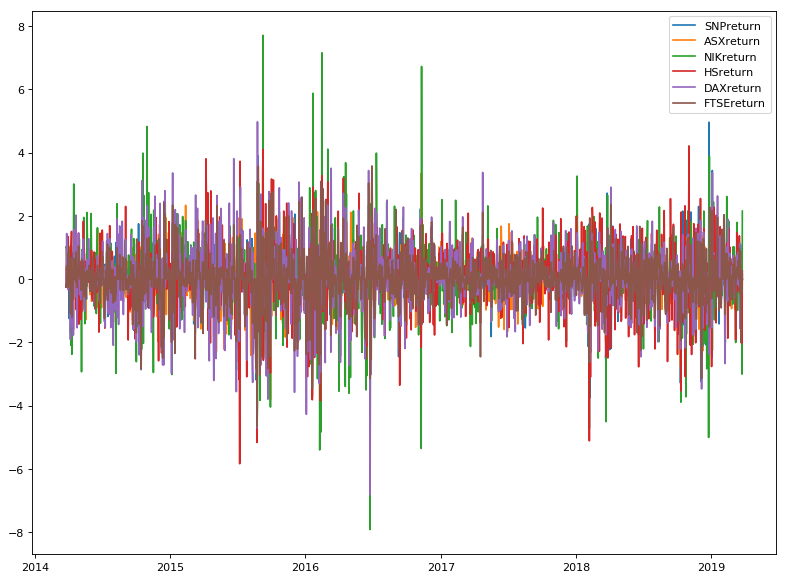

In [146]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(finaldata.iloc[:,0],finaldata.iloc[:,1:7])
plt.legend(finaldata.columns[1:7])

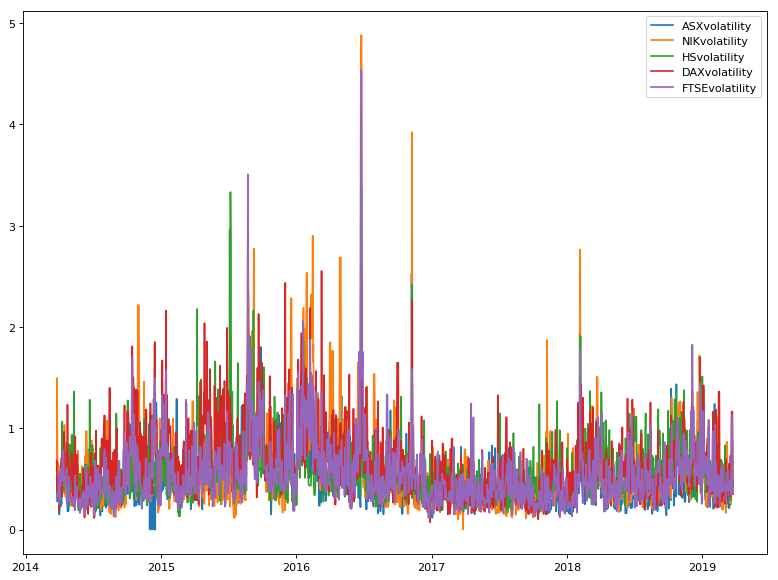

In [147]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(finaldata.iloc[:,0],finaldata.iloc[:,7:])
plt.legend(finaldata.columns[7:])

In [148]:
#Using Plotly. I prefer this plot since you can check specific data info with the iteractive graphs.
trace0 = go.Scatter(
    x = datelist,
    y = finaldata['ASXreturn'],
    mode = 'lines',
    name = 'ASX'
)
trace1 = go.Scatter(
    x = datelist,
    y = finaldata['NIKreturn'],
    mode = 'lines',
    name = 'NIK'
)
trace2 = go.Scatter(
    x = datelist,
    y = finaldata['HSreturn'],
    mode = 'lines',
    name = 'HS'
)
trace3 = go.Scatter(
    x = datelist,
    y = finaldata['DAXreturn'],
    mode = 'lines',
    name = 'DAX'
)
trace4 = go.Scatter(
    x = datelist,
    y = finaldata['FTSEreturn'],
    mode = 'lines',
    name = 'FTSE'
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = dict(title = 'DAILY RETURN',
              )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [149]:
trace0 = go.Scatter(
    x = datelist,
    y = finaldata['ASXvolatility'],
    mode = 'lines',
    name = 'ASX'
)
trace1 = go.Scatter(
    x = datelist,
    y = finaldata['NIKvolatility'],
    mode = 'lines',
    name = 'NIK'
)
trace2 = go.Scatter(
    x = datelist,
    y = finaldata['HSvolatility'],
    mode = 'lines',
    name = 'HS'
)
trace3 = go.Scatter(
    x = datelist,
    y = finaldata['DAXvolatility'],
    mode = 'lines',
    name = 'DAX'
)
trace4 = go.Scatter(
    x = datelist,
    y = finaldata['FTSEvolatility'],
    mode = 'lines',
    name = 'FTSE'
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = dict(title = 'VOLATILITY',
              )

fig = dict(data=data, layout=layout)
py.iplot(fig)

Targeted data we are trying to predict is S&P500 return movement. I will convert S&P500 return data to either to different boolean data columns; negative return and positive return

The Tensorflow model here will solve a classification model, positive return or negative return. To do this, the output prediction should be in a form called 'One hot encoding'. It means that each class choice will be an entry in an array. If the SNP return is possitive, array should be [1,0]. If it is negative, it should be [0,1]. The model prediction will not likely look like the examples before but more like a probability. Using argmax, the returned index value will be able to tell us how classification has been 'predicted', i.e. positive if 0, negative if 1.

In [170]:
finaldata['Negative']=[True if x<0 else False for x in finaldata['SNPreturn']]
finaldata['Positive']=[True if x>=0 else False for x in finaldata['SNPreturn']]

In [171]:
finaldata = finaldata.drop(columns=['SNPreturn'])

In [172]:
finaldata.head()

,Date,ASXreturn,NIKreturn,HSreturn,DAXreturn,FTSEreturn,ASXvolatility,NIKvolatility,HSvolatility,DAXvolatility,FTSEvolatility,Negative,Positive
0,2014-03-26,0.314009,1.006617,-0.243519,0.027834,-0.257066,0.510324,0.581542,0.322098,0.681416,0.315582,True,False
1,2014-03-27,0.314009,1.006617,-0.243519,0.027834,-0.257066,0.278108,1.495587,0.483931,0.378480,0.333493,True,False
2,2014-03-28,0.000000,0.500179,1.058328,1.438763,0.413763,0.278108,0.659779,0.482919,0.536334,0.346140,False,True
3,2014-03-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.278108,0.659779,0.482919,0.536334,0.346140,False,True
4,2014-03-30,0.519851,0.000000,0.000000,0.000000,0.000000,0.455352,0.659779,0.482919,0.536334,0.346140,False,True


## 5. Training Models

In [181]:
#Seperating the data into training and test dataset. 80% will be training and 20% will be test
traininglegth = int(finaldata.shape[0] * 0.8)
training_data = finaldata.iloc[:traininglegth,1:]
test_data = finaldata.iloc[traininglegth: , 1:]

In [182]:
training_y = training_data[['Negative','Positive']]
training_x = training_data.drop(['Negative','Positive'],axis=1)

In [183]:
test_y = test_data[['Negative','Positive']]
test_x = test_data.drop(['Negative','Positive'],axis=1)

In [184]:
num_predictor = training_x.shape[1]
num_class = training_y.shape[1]

In [185]:
graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("Input"):
        x = tf.placeholder(shape=[None,num_predictor], dtype=tf.float32, name='x')
        y = tf.placeholder(shape=[None,num_class], dtype=tf.float32, name='y')
    
    with tf.name_scope("Simple_Model"):
        with tf.name_scope("Variables"):
            w = tf.Variable(tf.truncated_normal([num_predictor, num_class], stddev=0.1), name="W")
            b = tf.Variable(tf.truncated_normal([num_class], stddev=0.1), name="b")

        model = tf.nn.softmax(tf.matmul(x, w) + b)
        
        with tf.name_scope("Result"):
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y), name="cost")
            correct_prediction = tf.equal(tf.argmax(model,1),tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        with tf.name_scope("Train"):
            training = tf.train.AdamOptimizer(0.1).minimize(cost)
    
    with tf.name_scope("Two_Layer"):
        node_1 = 5
        node_2 = 3
        with tf.name_scope("Variables2"):
            w1 = tf.Variable(tf.truncated_normal([num_predictor, node_1], stddev=0.1), name="W1")
            b1 = tf.Variable(tf.truncated_normal([node_1], stddev=0.1), name="b1")
            w2 = tf.Variable(tf.truncated_normal([node_1, node_2], stddev=0.1), name ="W2")
            b2 = tf.Variable(tf.truncated_normal([node_2], stddev=0.1), name="b2")
            w3 = tf.Variable(tf.truncated_normal([node_2, num_class], stddev=0.1), name="W3")
            b3 = tf.Variable(tf.truncated_normal([num_class], stddev=0.1), name="b3")
        
        with tf.name_scope("Layer1"):
            hidden_layer_1 = tf.nn.relu(tf.matmul(x, w1) + b1)

        with tf.name_scope("Layer2"):
            hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, w2) + b2)
        
        model2 = tf.nn.softmax(tf.matmul(hidden_layer_2, w3) + b3)
        
        with tf.name_scope("Result2"):
            cost2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model2, labels=y), name="cost2")
            correct_prediction2 = tf.equal(tf.argmax(model2,1),tf.argmax(y,1))
            accuracy2 = tf.reduce_mean(tf.cast(correct_prediction2, tf.float32))  
            
        with tf.name_scope("Train2"):
            training2 = tf.train.AdamOptimizer(0.005).minimize(cost2)
            
    with tf.name_scope("Summary"):
        tf.summary.scalar("Accuracy_1", accuracy)
        tf.summary.scalar("Accuracy_2", accuracy2)
        
    with tf.name_scope("global_ops"):
        init = tf.global_variables_initializer()
        # Collect all summary Ops in graph
        summ = tf.summary.merge_all()

In [186]:
sess = tf.Session(graph=graph)
writer = tf.summary.FileWriter('./FinalGraph', graph=graph)
sess.run(init)

In [188]:
starting_time = datetime.now()
for i in range(1, 10000):
    _,__, _accuracy, _accuracy2, _cost, _cost2, _summ = sess.run([training, training2, accuracy, accuracy2, cost, cost2, summ],
                                                                feed_dict={x: training_x.values,
                                                                          y: training_y.values.reshape(len(training_y.values),2)})
    if i%100 == 0:
        writer.add_summary(_summ, i)
    if i%1000 == 0:
        print(_accuracy)
        print(_accuracy2)
        print("Processing... %sth loop" %i)

Processing_time = datetime.now() - starting_time

0.807666
0.83367556
Processing... 1000th loop
0.807666
0.83367556
Processing... 2000th loop
0.807666
0.83367556
Processing... 3000th loop
0.807666
0.83367556
Processing... 4000th loop
0.807666
0.83367556
Processing... 5000th loop
0.807666
0.83367556
Processing... 6000th loop
0.807666
0.83367556
Processing... 7000th loop
0.807666
0.83367556
Processing... 8000th loop
0.807666
0.83367556
Processing... 9000th loop


In [189]:
print("Final Accuracy of Simple model %s" %_accuracy)

Final Accuracy of Simple model 0.807666


In [190]:
print("Final Accuracy of Two Layer model %s" %_accuracy2)

Final Accuracy of Two Layer model 0.83367556


In [191]:
_Predict1,_Predict2 = sess.run([accuracy,accuracy2], feed_dict={x: test_x.values,
                                                                y: test_y.values.reshape(len(test_y.values),2)})

In [192]:
print("Using Simple Model, test accuracy is %s" %_Predict1)

Using Simple Model, test accuracy is 0.7295082


In [193]:
print("Usint Two Hidden Layers, test accuracy is %s" %_Predict2)

Usint Two Hidden Layers, test accuracy is 0.75136614


In [194]:
print("Total time %s" %Processing_time)

Total time 0:01:47.225912
